In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="Latin America") & (data.business_area_name=="F00 - GCCT")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
53,F00 - GCCT,Latin America,2017-01-01,383697.80
79,F00 - GCCT,Latin America,2017-02-01,391486.91
117,F00 - GCCT,Latin America,2017-03-01,376466.88
134,F00 - GCCT,Latin America,2017-04-01,422881.85
161,F00 - GCCT,Latin America,2017-05-01,434543.50


,date,sales
0,2017-01-01,383697.80
1,2017-02-01,391486.91
2,2017-03-01,376466.88
3,2017-04-01,422881.85
4,2017-05-01,434543.50


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

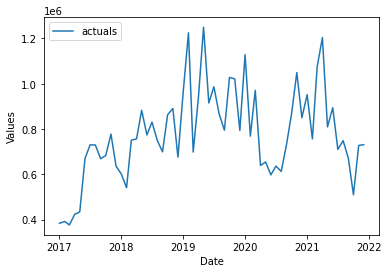

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

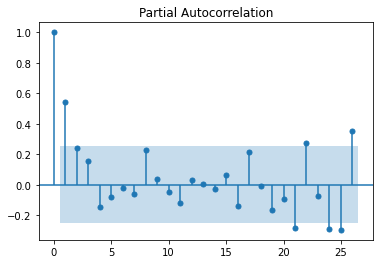

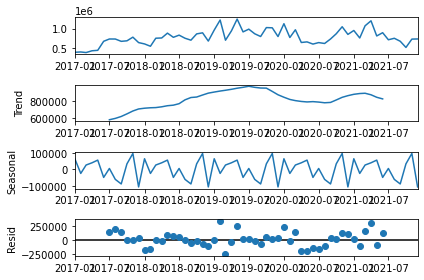

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
2/2 [==============================] - 96s 14s/step - loss: 0.5797 - val_loss: 0.5086
Epoch 2/200
2/2 [==============================] - 0s 170ms/step - loss: 0.5598 - val_loss: 0.4694
Epoch 3/200
2/2 [==============================] - 0s 179ms/step - loss: 0.5174 - val_loss: 0.3761
Epoch 4/200
2/2 [==============================] - 0s 180ms/step - loss: 0.4154 - val_loss: 0.1966
Epoch 5/200
2/2 [==============================] - 0s 181ms/step - loss: 0.2482 - val_loss: 0.3665
Epoch 6/200
2/2 [==============================] - 0s 180ms/step - loss: 0.3127 - val_loss: 0.2286
Epoch 7/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1980 - val_loss: 0.1390
Epoch 8/200
2/2 [==============================] - 0s 163ms/step - loss: 0.1950 - val_loss: 0.1600
Epoch 9/200
2/2 [==============================] - 0s 169ms/step - loss: 0.2217 - val_loss: 0.1603
Epoch 10/200
2/2 [==============================] - 0s 186ms/step - loss: 0.2129 - val_loss: 0.1565
Epoch 11/2

2/2 [==============================] - 0s 194ms/step - loss: 0.1725 - val_loss: 0.1724
Epoch 84/200
2/2 [==============================] - 0s 209ms/step - loss: 0.1713 - val_loss: 0.1634
Epoch 85/200
2/2 [==============================] - 0s 185ms/step - loss: 0.1703 - val_loss: 0.1630
Epoch 86/200
2/2 [==============================] - 0s 204ms/step - loss: 0.1706 - val_loss: 0.1732
Epoch 87/200
2/2 [==============================] - 0s 215ms/step - loss: 0.1717 - val_loss: 0.1911
Epoch 88/200
2/2 [==============================] - 0s 191ms/step - loss: 0.1762 - val_loss: 0.1882
Epoch 89/200
2/2 [==============================] - 0s 205ms/step - loss: 0.1749 - val_loss: 0.1632
Epoch 90/200
2/2 [==============================] - 0s 180ms/step - loss: 0.1704 - val_loss: 0.1465
Epoch 91/200
2/2 [==============================] - 0s 191ms/step - loss: 0.1718 - val_loss: 0.1444
Epoch 92/200
2/2 [==============================] - 0s 181ms/step - loss: 0.1723 - val_loss: 0.1511
Epoch 93/200


2/2 [==============================] - 0s 193ms/step - loss: 0.1719 - val_loss: 0.1615
Epoch 165/200
2/2 [==============================] - 0s 174ms/step - loss: 0.1709 - val_loss: 0.1557
Epoch 166/200
2/2 [==============================] - 0s 189ms/step - loss: 0.1714 - val_loss: 0.1585
Epoch 167/200
2/2 [==============================] - 0s 215ms/step - loss: 0.1700 - val_loss: 0.1721
Epoch 168/200
2/2 [==============================] - 0s 184ms/step - loss: 0.1708 - val_loss: 0.1729
Epoch 169/200
2/2 [==============================] - 0s 182ms/step - loss: 0.1714 - val_loss: 0.1579
Epoch 170/200
2/2 [==============================] - 0s 202ms/step - loss: 0.1699 - val_loss: 0.1394
Epoch 171/200
2/2 [==============================] - 0s 179ms/step - loss: 0.1753 - val_loss: 0.1352
Epoch 172/200
2/2 [==============================] - 0s 191ms/step - loss: 0.1842 - val_loss: 0.1371
Epoch 173/200
2/2 [==============================] - 0s 178ms/step - loss: 0.1818 - val_loss: 0.1469
Epoc

Epoch 46/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1688 - val_loss: 0.1630
Epoch 47/200
2/2 [==============================] - 0s 192ms/step - loss: 0.1695 - val_loss: 0.1632
Epoch 48/200
2/2 [==============================] - 0s 181ms/step - loss: 0.1694 - val_loss: 0.1585
Epoch 49/200
2/2 [==============================] - 0s 172ms/step - loss: 0.1690 - val_loss: 0.1582
Epoch 50/200
2/2 [==============================] - 0s 179ms/step - loss: 0.1690 - val_loss: 0.1588
Epoch 51/200
2/2 [==============================] - 0s 178ms/step - loss: 0.1692 - val_loss: 0.1607
Epoch 52/200
2/2 [==============================] - 0s 175ms/step - loss: 0.1695 - val_loss: 0.1607
Epoch 53/200
2/2 [==============================] - 0s 192ms/step - loss: 0.1696 - val_loss: 0.1625
Epoch 54/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1688 - val_loss: 0.1610
Epoch 55/200
2/2 [==============================] - 0s 196ms/step - loss: 0.1689 - val_loss: 0.1609


2/2 [==============================] - 0s 184ms/step - loss: 0.1693 - val_loss: 0.1615
Epoch 128/200
2/2 [==============================] - 0s 193ms/step - loss: 0.1688 - val_loss: 0.1619
Epoch 129/200
2/2 [==============================] - 0s 205ms/step - loss: 0.1689 - val_loss: 0.1632
Epoch 130/200
2/2 [==============================] - 0s 195ms/step - loss: 0.1692 - val_loss: 0.1650
Epoch 131/200
2/2 [==============================] - 0s 199ms/step - loss: 0.1692 - val_loss: 0.1633
Epoch 132/200
2/2 [==============================] - 0s 188ms/step - loss: 0.1690 - val_loss: 0.1615
Epoch 133/200
2/2 [==============================] - 0s 200ms/step - loss: 0.1694 - val_loss: 0.1616
Epoch 134/200
2/2 [==============================] - 0s 211ms/step - loss: 0.1687 - val_loss: 0.1599
Epoch 135/200
2/2 [==============================] - 0s 189ms/step - loss: 0.1700 - val_loss: 0.1605
Epoch 136/200
2/2 [==============================] - 0s 202ms/step - loss: 0.1689 - val_loss: 0.1609
Epoc

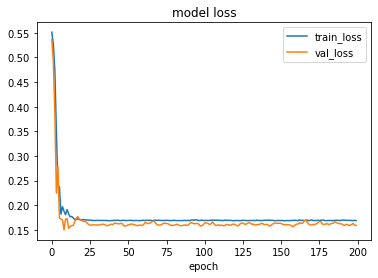

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=12,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

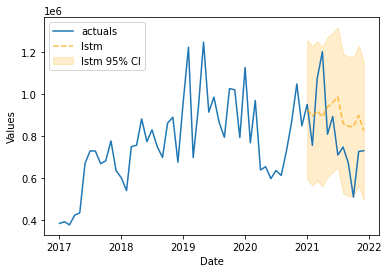

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

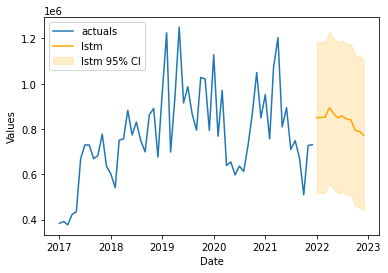

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.22,190202.28,-0.11,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,1259806.08,926790.35,951743.06,593774.63,lstm,0.95
1,2021-02-01,1230314.21,897298.49,756251.54,564282.77,lstm,0.95
2,2021-03-01,1253685.07,920669.35,1074369.93,587653.63,lstm,0.95
3,2021-04-01,1226150.69,893134.97,1203963.68,560119.25,lstm,0.95
4,2021-05-01,1272598.06,939582.34,809408.35,606566.62,lstm,0.95
5,2021-06-01,1293925.64,960909.91,894091.31,627894.19,lstm,0.95
6,2021-07-01,1320389.93,987374.21,709933.90,654358.49,lstm,0.95
7,2021-08-01,1193769.15,860753.42,748685.82,527737.70,lstm,0.95
8,2021-09-01,1180315.68,847299.96,671007.21,514284.24,lstm,0.95
9,2021-10-01,1178026.08,845010.36,509552.62,511994.63,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,1182947.55,849931.82,516916.10,lstm,0.95
1,2022-02-01,1184391.01,851375.29,518359.56,lstm,0.95
2,2022-03-01,1184974.70,851958.98,518943.26,lstm,0.95
3,2022-04-01,1227384.31,894368.59,561352.87,lstm,0.95
4,2022-05-01,1201406.72,868391.00,535375.27,lstm,0.95
5,2022-06-01,1181482.91,848467.19,515451.46,lstm,0.95
6,2022-07-01,1190919.68,857903.96,524888.24,lstm,0.95
7,2022-08-01,1177150.70,844134.98,511119.25,lstm,0.95
8,2022-09-01,1172863.71,839847.98,506832.26,lstm,0.95
9,2022-10-01,1126721.81,793706.09,460690.37,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:9787057.396818
Total_2022:10061703.658398002
YOY (growth):2.806218973123581
